In [1]:
# ---------------------------
# 1. Imports
# ---------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# For interactive plots (optional)
import plotly.express as px

# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
# ---------------------------
# 2. Load the Data
# ---------------------------

# Define file path
DATA_PATH = "../data/raw/WHO_PM25_urban_2022.csv"

# Load CSV
try:
    df = pd.read_csv(DATA_PATH)
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please make sure the CSV is in data/raw/")
    raise

# Preview
df.head()

✅ Data loaded successfully.


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.01,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12T05:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,True,Residence Area Type,Rural,RESIDENCEAREATYPE_RUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12T05:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.06,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12T05:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,True,Residence Area Type,Total,RESIDENCEAREATYPE_TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.08,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12T05:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,True,Residence Area Type,Towns,RESIDENCEAREATYPE_TOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.09,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12T05:00:00.000Z


In [5]:
# ---------------------------
# 3. Quick Overview
# ---------------------------

print(f"\n🧾 Number of rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n📄 Column names:")
print(df.columns.tolist())

# Check datatypes
df.dtypes


🧾 Number of rows: 9450, Columns: 34

📄 Column names:
['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified']


IndicatorCode                  object
Indicator                      object
ValueType                      object
ParentLocationCode             object
ParentLocation                 object
Location type                  object
SpatialDimValueCode            object
Location                       object
Period type                    object
Period                          int64
IsLatestYear                     bool
Dim1 type                      object
Dim1                           object
Dim1ValueCode                  object
Dim2 type                     float64
Dim2                          float64
Dim2ValueCode                 float64
Dim3 type                     float64
Dim3                          float64
Dim3ValueCode                 float64
DataSourceDimValueCode        float64
DataSource                    float64
FactValueNumericPrefix        float64
FactValueNumeric              float64
FactValueUoM                  float64
FactValueNumericLowPrefix     float64
FactValueNum

In [6]:
# ---------------------------
# 4. Descriptive Statistics
# ---------------------------

df.describe(include='all')

# Check nulls
print("\n🧼 Missing values per column:")
print(df.isnull().sum())


🧼 Missing values per column:
IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                     9450
Dim2                          9450
Dim2ValueCode                 9450
Dim3 type                     9450
Dim3                          9450
Dim3ValueCode                 9450
DataSourceDimValueCode        9450
DataSource                    9450
FactValueNumericPrefix        9450
FactValueNumeric                 0
FactValueUoM                  9450
FactValueNumericLowPrefix     9450
FactValueNumericLow              0
FactValueNumericHighPrefi

In [9]:
# ---------------------------
# 5. Unique Countries (Location) and Years (Period)
# ---------------------------

# if 'Country' in df.columns:
#     print(f"\n🌍 Number of unique countries: {df['Country'].nunique()}")
#     print(df['Country'].unique()[:10])

# if 'Year' in df.columns:
#     print(f"\n📅 Year range: {df['Year'].min()} to {df['Year'].max()}")

if 'Location' in df.columns:
    print(f"\n🌍 Number of unique countries: {df['Location'].nunique()}")
    print(df['Location'].unique()[:10])

if 'Period' in df.columns:
    print(f"\n📅 Year range: {df['Period'].min()} to {df['Period'].max()}")


🌍 Number of unique countries: 195
['Kenya' 'Trinidad and Tobago'
 'United Kingdom of Great Britain and Northern Ireland' 'Grenada' 'Brazil'
 'Denmark' 'Russian Federation' 'Spain' 'France' 'Guyana']

📅 Year range: 2010 to 2019


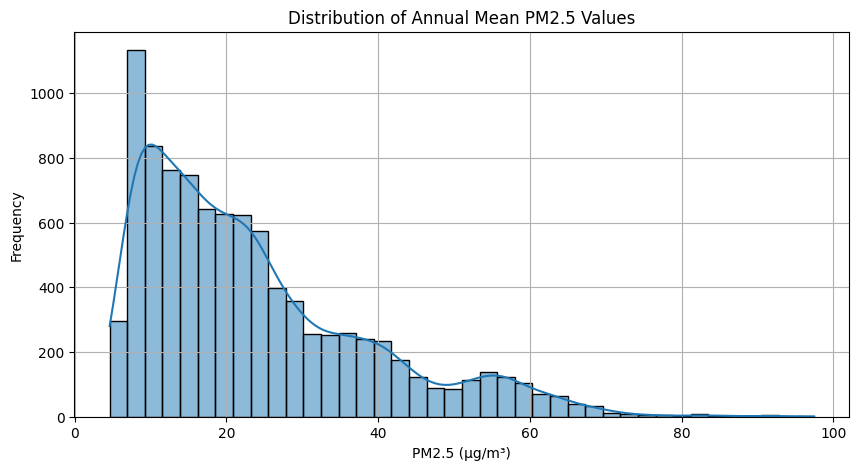

/var/folders/xn/f22k2n417tddr831ph76t6d80000gn/T/ipykernel_51100/2318115137.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='Location', y=pm_col, palette='Reds_r')


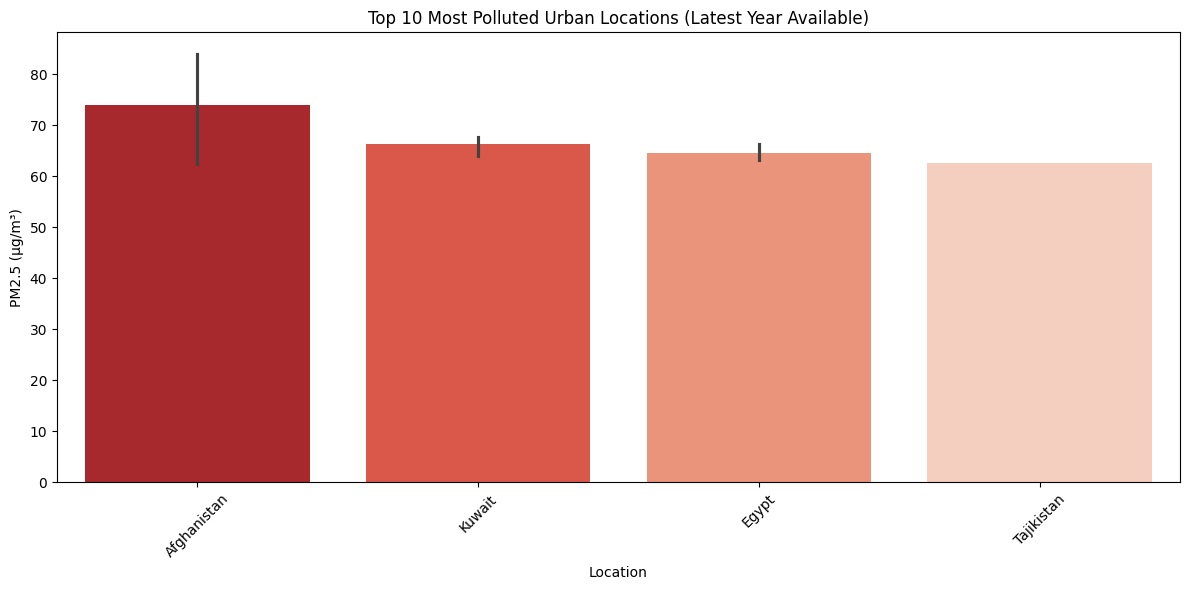

In [7]:
# ---------------------------
# 6. Visual Exploration
# ---------------------------

pm_col = 'FactValueNumeric'

# Distribution of PM2.5 values
plt.figure(figsize=(10, 5))
sns.histplot(df[pm_col], bins=40, kde=True)
plt.title("Distribution of Annual Mean PM2.5 Values")
plt.xlabel("PM2.5 (μg/m³)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 10 most polluted locations (latest year only)
latest_year = df[df['IsLatestYear'] == 1]
top_locations = latest_year.sort_values(by=pm_col, ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='Location', y=pm_col, palette='Reds_r')
plt.title("Top 10 Most Polluted Urban Locations (Latest Year Available)")
plt.ylabel("PM2.5 (μg/m³)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Interactive choropleth (if 'Location' is mappable to country names)
# Note: Requires cleaning or standardizing country/location names first
choropleth_df = df.groupby('Location')[pm_col].mean().reset_index()
fig = px.choropleth(
    choropleth_df,
    locations="Location",
    locationmode="country names",  # Might need to adjust based on real values
    color=pm_col,
    color_continuous_scale="Viridis",
    title="Average Urban PM2.5 Concentration by Location"
)
fig.show()


In [8]:
# ---------------------------
# 7. Save Interim Version
# ---------------------------

interim_path = "../data/interim/pm25_explored.csv"
df.to_csv(interim_path, index=False)
print(f"\n💾 Interim file saved to: {interim_path}")



💾 Interim file saved to: ../data/interim/pm25_explored.csv
